# Example of Hodgkin–Huxley model

In [1]:
import brainpy as bp
import brainmodels

In [2]:
def run_hh1():
  group = bp.math.jit(brainmodels.neurons.HH(2, monitors=['V']))

  group.run(200., inputs=('input', 10.), report=0.1)
  bp.visualize.line_plot(group.mon.ts, group.mon.V, show=True)

  group.run(200., report=0.1)
  bp.visualize.line_plot(group.mon.ts, group.mon.V, show=True)

Compilation used 2.9621 s.
Start running ...
Run 10.0% used 0.003 s.
Run 20.0% used 0.005 s.
Run 30.0% used 0.008 s.
Run 40.0% used 0.011 s.
Run 50.0% used 0.014 s.
Run 60.0% used 0.017 s.
Run 70.0% used 0.020 s.
Run 80.0% used 0.023 s.
Run 90.0% used 0.026 s.
Run 100.0% used 0.029 s.
Simulation is done in 0.029 s.



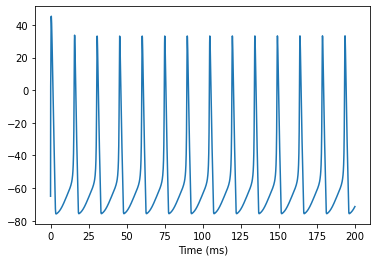

Compilation used 0.0000 s.
Start running ...
Run 10.0% used 0.002 s.
Run 20.0% used 0.004 s.
Run 30.0% used 0.006 s.
Run 40.0% used 0.008 s.
Run 50.0% used 0.010 s.
Run 60.0% used 0.012 s.
Run 70.0% used 0.014 s.
Run 80.0% used 0.016 s.
Run 90.0% used 0.018 s.
Run 100.0% used 0.020 s.
Simulation is done in 0.020 s.



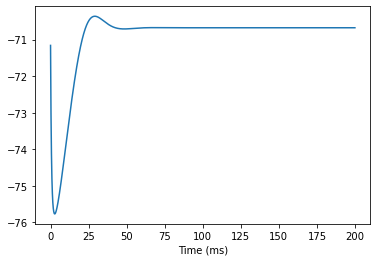

In [3]:
run_hh1()

In [4]:
def run_hh2():
  group = bp.math.jit(brainmodels.neurons.HH(2, monitors=bp.Monitor(variables=['V'], intervals=[1.])))

  group.run(200., inputs=('input', 10.), report=0.1)
  bp.visualize.line_plot(group.mon['V.t'], group.mon.V, show=True)

Compilation used 2.8153 s.
Start running ...
Run 10.0% used 0.002 s.
Run 20.0% used 0.005 s.
Run 30.0% used 0.007 s.
Run 40.0% used 0.009 s.
Run 50.0% used 0.011 s.
Run 60.0% used 0.013 s.
Run 70.0% used 0.015 s.
Run 80.0% used 0.018 s.
Run 90.0% used 0.020 s.
Run 100.0% used 0.022 s.
Simulation is done in 0.022 s.



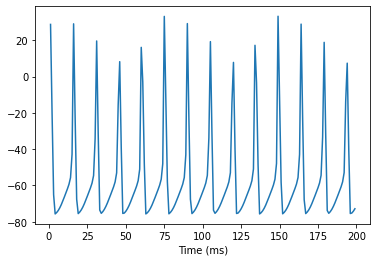

In [5]:
run_hh2()

In [ ]:
import matplotlib.pyplot as plt

def run_hh3():
  group = bp.math.jit(brainmodels.neurons.HH(2, monitors=['V']))

  I1 = bp.inputs.spike_input(sp_times=[500., 550., 1000, 1030, 1060, 1100, 1200], sp_lens=5, sp_sizes=5., duration=2000, )
  I2 = bp.inputs.spike_input(sp_times=[600.,       900, 950, 1500], sp_lens=5, sp_sizes=5., duration=2000, )
  I1 += bp.math.random.normal(0, 3, size=I1.shape)
  I2 += bp.math.random.normal(0, 3, size=I2.shape)
  I = bp.math.stack((I1, I2), axis=-1)
  group.run(2000., inputs=('input', I, 'iter'), report=0.1)

  fig, gs = bp.visualize.get_figure(1, 1, 2, 10)
  fig.add_subplot(gs[0, 0])
  plt.plot(group.mon.ts, group.mon.V[:, 0])
  plt.plot(group.mon.ts, group.mon.V[:, 1] + 130)
  plt.xlim(10, 2000)
  plt.xticks([])
  plt.yticks([])
  plt.show()